# Assignment 5: Unsupervised Learning KNN model - Varadharajan Suresh

### Introduction
The inpatientCharges.csv dataset is provided by centers for medicare and mediaid services. It contains discharges and cost by each hospital across different states and geographical zones for various Diagnosis Related Group (DRG).


We shall be preparing and analysing the data to detect anomalies, it identify any abuse of hospital resources for monetary gain. By benchmarking common practices and filtering data beyond acceptable standards using KNN model.

In [ ]:
!conda install plotly

In [1]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv")
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [3]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns 
print(df.shape)
# check column names
print(df.columns)
# get the Simple Summary Statistics of all variables included in the dataset
df.describe(include='all')

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
count,442458.000000,442458.000000,442458,442458,442458,442458,4.424580e+05,442458,442458,442458,442458
unique,NaN,NaN,124,3911,38,88749,NaN,86729,392,258,435
top,NaN,NaN,OKLAHOMA STATE UNIVERSITY,JOURNEY HOUSE TRAVEL INC,J,GENERAL PURCHASE,NaN,STAPLES,09/11/2013 12:00:00 AM,01/13/2014 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
freq,NaN,NaN,115995,10137,55031,247187,NaN,14842,2122,3256,24860
mean,201357.284375,42785.860353,NaN,NaN,NaN,NaN,4.249912e+02,NaN,NaN,NaN,NaN
std,47.107417,33378.461293,NaN,NaN,NaN,NaN,5.266509e+03,NaN,NaN,NaN,NaN
min,201307.000000,1000.000000,NaN,NaN,NaN,NaN,-4.286304e+04,NaN,NaN,NaN,NaN
25%,201309.000000,1000.000000,NaN,NaN,NaN,NaN,3.091000e+01,NaN,NaN,NaN,NaN
50%,201401.000000,47700.000000,NaN,NaN,NaN,NaN,1.048900e+02,NaN,NaN,NaN,NaN
75%,201404.000000,76000.000000,NaN,NaN,NaN,NaN,3.450000e+02,NaN,NaN,NaN,NaN


In [4]:
# change column names to make them more accessible 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

# Make an ID for each transaction for easier merging
df.insert(0, 'Tx_ID', range(0, 0 + len(df)))

### Create date fields

In [5]:
#converting transaction date and posted date to datetime[64] 
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

#converting year-month attribute to datetime[64]
df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')

# extract year and month from year-month to create 2 new columns
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

# create a column named week_number denoting week number
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

In [6]:
# create column named day_of_week denoting the day of week
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

### Section 2: Initial Observations 

<AxesSubplot:xlabel='Count', ylabel='Agency_Name'>

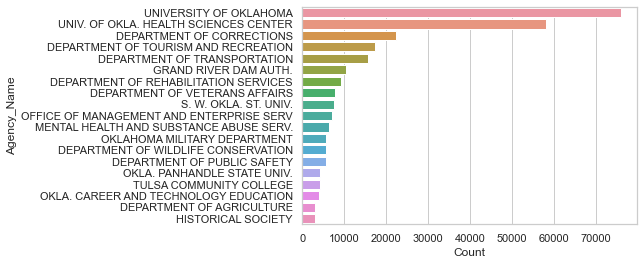

In [7]:
# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name','Count']
fig = px.bar(df_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=1000, height=400)

sns.set_theme(style="whitegrid")
sns.barplot(y="Agency_Name", x="Count", data=df_count[1:20])

<AxesSubplot:xlabel='Count', ylabel='Vendor'>

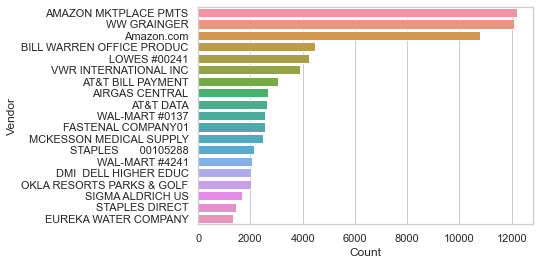

In [8]:
# Summarize the count statistics by Vendor in df_count
df_count = df['Vendor'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Vendor','Count']

# Show the top 20 merchants
sns.set_theme(style="whitegrid")
sns.barplot(y="Vendor", x="Count", data=df_count[1:20])

## Section 3 Feature Engineering
###  3.1 Feature 1: The ratio to average amount

In [9]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']

# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])

# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.996757e-01
std      7.547215e+13
min     -2.191001e+16
25%      1.771615e-01
50%      5.153201e-01
75%      1.102916e+00
max      2.191001e+16
Name: agency_merchant_avg_ratio_amount, dtype: float64

### 3.2 Feature 2: The ratio to the median amount

In [10]:
# create median spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_amount']

# add the new feature median spending to the dataset 
df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])

# Feature 1: ratio of amount spending and median spending by merchant category 
df1['agency_merchant_median_ratio_amount'] = np.where(df1['median_amount']==0,0, df1['Amount'] / df1['median_amount'])
df1['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

### 3.3 Feature 3: The ratio to the average amount grouped by agency, merchant category and month
Grouping by agency, MCC and Month we calculate the average amount spent. This helps understand the monthly expenditure for a person in an agency per merchant category.

In [11]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category','Month'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['avg_amount_amm']

# add the new feature average spending to the dataset 
df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category','Month'])

In [12]:
# Feature 3: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount_month'] = np.where(df1['avg_amount_amm']==0,0, df1['Amount'] / df1['avg_amount_amm'])
df1['agency_merchant_avg_ratio_amount_month'].describe()

count    4.424580e+05
mean     9.990183e-01
std      1.781013e+14
min     -3.900927e+16
25%      2.017872e-01
50%      5.985407e-01
75%      1.125320e+00
max      5.267839e+16
Name: agency_merchant_avg_ratio_amount_month, dtype: float64

### 3.4 Feature 4: The ratio to median amount per month per merchant

In [13]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category','Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_amount_amm']

# add the new feature average spending to the dataset 
df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category','Month'])

In [14]:
# Feature 4: ratio of amount spending and median spending by merchant category 
df1['agency_merchant_med_ratio_amount_month'] = np.where(df1['median_amount_amm']==0,0, df1['Amount'] / df1['median_amount_amm'])
df1['agency_merchant_med_ratio_amount_month'].describe()

count    442458.000000
mean          5.010047
std        1195.766096
min      -29642.000000
25%           0.500000
50%           1.000000
75%           1.912717
max      598420.505983
Name: agency_merchant_med_ratio_amount_month, dtype: float64

### 3.5 Feature 5: The ratio to the average amount grouped by year and month per person

Grouping by Year, Month and Person we calculate the average amount spent. This helps understand the average monthly expenditure in year per person

In [15]:
# create average spending group by year and month per person
stat_by_agency = df.groupby(['Year', 'Month','Cardholder_Last_Name'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_expense_per_person']

# add the new feature average spending to the dataset 
df1 = pd.merge(df1, stat_by_agency, how='left', on=['Year', 'Month','Cardholder_Last_Name'])

In [16]:
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['monthly_avg_person_ratio_amount'] = np.where(df1['mean_expense_per_person']==0,0, df1['Amount'] / df1['mean_expense_per_person'])
df1['monthly_avg_person_ratio_amount'].describe()

count    4.424580e+05
mean     9.996490e-01
std      1.578997e+14
min     -7.151575e+16
25%      1.462510e-01
50%      4.953139e-01
75%      1.271078e+00
max      6.403556e+16
Name: monthly_avg_person_ratio_amount, dtype: float64

### 3.6 Feature 6: The ratio to the median amount grouped by year and month per person

Grouping by Year, Month and Person we calculate the meadian amount spent. This helps understand the median monthly expenditure in year per person

In [17]:
# create average spending group by year and month per person
stat_by_agency = df.groupby(['Year', 'Month','Cardholder_Last_Name'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_expense_per_person']

# add the new feature average spending to the dataset 
df1 = pd.merge(df1, stat_by_agency, how='left', on=['Year', 'Month','Cardholder_Last_Name'])

In [18]:
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['monthly_med_person_ratio_amount'] = np.where(df1['median_expense_per_person']==0,0, df1['Amount'] / df1['median_expense_per_person'])
df1['monthly_med_person_ratio_amount'].describe()

count    442458.000000
mean          2.773682
std          85.479848
min      -49090.000000
25%           0.401202
50%           1.000000
75%           2.343775
max        6000.000000
Name: monthly_med_person_ratio_amount, dtype: float64

### 3.7 Feature 7: The ratio to the average amount grouped by Cardholder Last Name and Merchant Category Code (MCC)

In [19]:
# create average spending group by Cardholder Last Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Cardholder_Last_Name','Merchant_Category'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_mcc_person']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Cardholder_Last_Name','Merchant_Category'])

In [20]:
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['mean_mcc_person_ratio_amount'] = np.where(df1['mean_mcc_person']==0,0, df1['Amount'] / df1['mean_mcc_person'])
df1['mean_mcc_person_ratio_amount'].describe()

count    4.424580e+05
mean     9.965958e-01
std      4.338485e+14
min     -7.151575e+16
25%      3.305758e-01
50%      8.044115e-01
75%      1.202406e+00
max      1.014323e+17
Name: mean_mcc_person_ratio_amount, dtype: float64

### 3.8 Feature 8: The ratio to the median amount grouped by Cardholder Last Name and Merchant Category Code (MCC)

In [21]:
# create average spending group by Cardholder Last Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Cardholder_Last_Name','Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_mcc_person']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Cardholder_Last_Name','Merchant_Category'])

In [22]:
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['median_mcc_person_ratio_amount'] = np.where(df1['median_mcc_person']==0,0, df1['Amount'] / df1['median_mcc_person'])
df1['median_mcc_person_ratio_amount'].describe()

count    4.424580e+05
mean     1.051513e+02
std      4.860020e+04
min     -8.195918e+02
25%      6.056647e-01
50%      1.000000e+00
75%      1.540674e+00
max      2.379823e+07
Name: median_mcc_person_ratio_amount, dtype: float64

### 3.9 Feature 9: The ratio to the average amount grouped by Agency Name and Merchant Category Code (MCC) and Day of Week

In [23]:
# create average spending group by Agency Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Agency_Name','Merchant_Category','Day_of_Week'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_week_mcc_agency_person']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name','Merchant_Category','Day_of_Week'])

In [24]:
# Feature 1: ratio of amount spending and average spending by merchant category 
df1['mean_week_mcc_agency_person_ratio_amount'] = np.where(df1['mean_week_mcc_agency_person']==0,0, df1['Amount'] / df1['mean_week_mcc_agency_person'])
df1['mean_week_mcc_agency_person_ratio_amount'].describe()

count    4.424580e+05
mean     9.986634e-01
std      7.395953e+14
min     -1.175113e+17
25%      1.938586e-01
50%      5.725592e-01
75%      1.115607e+00
max      1.175113e+17
Name: mean_week_mcc_agency_person_ratio_amount, dtype: float64

### 3.10 Feature 10: The ratio to the median amount grouped by Agency Name and Merchant Category Code (MCC) and Day of Week

In [25]:
# create median spending group by Agency Name and Merchant Category Code (MCC) and Day of Week
stat_by_agency = df.groupby(['Agency_Name','Merchant_Category','Day_of_Week'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_week_mcc_agency_person']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name','Merchant_Category','Day_of_Week'])

In [26]:
# Feature 1: ratio of amount spending and median spending by merchant category 
df1['median_week_mcc_agency_person_ratio_amount'] = np.where(df1['median_week_mcc_agency_person']==0,0, df1['Amount'] / df1['median_week_mcc_agency_person'])
df1['median_week_mcc_agency_person_ratio_amount'].describe()

count    442458.000000
mean          5.234871
std        1269.794267
min      -10476.000000
25%           0.492068
50%           1.000000
75%           1.978509
max      608261.460064
Name: median_week_mcc_agency_person_ratio_amount, dtype: float64

### 3.11 Feature 11: The ratio to the mean amount grouped by Agency Name and vendor

In [27]:
# create average spending group by Agency Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Agency_Name', 'Vendor'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_agency_vendor']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor'])

In [28]:
# Feature 1: ratio of amount spending and average spending by merchant category 
df1['mean_agency_vendor_ratio_amount'] = np.where(df1['mean_agency_vendor']==0,0, df1['Amount'] / df1['mean_agency_vendor'])
df1['mean_agency_vendor_ratio_amount'].describe()

count    4.424580e+05
mean     9.929604e-01
std      2.571723e+14
min     -6.944551e+16
25%      3.399514e-01
50%      9.543501e-01
75%      1.040772e+00
max      6.424385e+16
Name: mean_agency_vendor_ratio_amount, dtype: float64

### 3.12 Feature 12: The ratio to the median amount grouped by Agency Name and Vendor

In [29]:
# create average spending group by Agency Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Agency_Name', 'Vendor'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_agency_vendor']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor'])

In [30]:
# Feature 1: ratio of amount spending and average spending by merchant category 
df1['median_agency_vendor_ratio_amount'] = np.where(df1['median_agency_vendor']==0,0, df1['Amount'] / df1['median_agency_vendor'])
df1['median_agency_vendor_ratio_amount'].describe()

count    442458.000000
mean          1.829670
std          21.214313
min        -683.920000
25%           0.658277
50%           1.000000
75%           1.446572
max       13119.000000
Name: median_agency_vendor_ratio_amount, dtype: float64

### 3.13 Feature 13: The ratio to the mean amount grouped by Agency Name, vendor and month

In [31]:
# create average spending group by Agency Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Agency_Name', 'Vendor','Month'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_agency_vendor_month']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor','Month'])

In [32]:
# Feature 13: ratio of amount spending and average spending by merchant category 
df1['mean_agency_vendor_month_ratio_amount'] = np.where(df1['mean_agency_vendor_month']==0,0, df1['Amount'] / df1['mean_agency_vendor_month'])
df1['mean_agency_vendor_month_ratio_amount'].describe()

count    4.424580e+05
mean     9.940944e-01
std      4.174233e+14
min     -1.266826e+17
25%      4.631081e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.263193e+17
Name: mean_agency_vendor_month_ratio_amount, dtype: float64

### 3.14 Feature 14: The ratio to the median amount grouped by Agency Name, vendor and month

In [33]:
# create average spending group by Agency Name and Merchant Category Code (MCC)
stat_by_agency = df.groupby(['Agency_Name', 'Vendor','Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_agency_vendor_month']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor','Month'])

In [34]:
# Feature 13: ratio of amount spending and average spending by merchant category 
df1['median_agency_vendor_month_ratio_amount'] = np.where(df1['median_agency_vendor_month']==0,0, df1['Amount'] / df1['median_agency_vendor_month'])
df1['median_agency_vendor_month_ratio_amount'].describe()

count    442458.000000
mean          1.798033
std          98.046931
min       -2087.333333
25%           0.822357
50%           1.000000
75%           1.166989
max       63226.000000
Name: median_agency_vendor_month_ratio_amount, dtype: float64

### 3.15 Feature 15: The ratio to the mean amount grouped by Agency Name, vendor and day of week

In [35]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Vendor','Day_of_Week'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_agency_vendor_dow']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor','Day_of_Week'])

In [36]:
# Feature 13: ratio of amount spending and average spending by merchant category 
df1['mean_agency_vendor_dow_ratio_amount'] = np.where(df1['mean_agency_vendor_dow']==0,0, df1['Amount'] / df1['mean_agency_vendor_dow'])
df1['mean_agency_vendor_dow_ratio_amount'].describe()

count    4.424580e+05
mean     9.966087e-01
std      1.302548e+14
min     -3.425128e+16
25%      4.289741e-01
50%      1.000000e+00
75%      1.000000e+00
max      3.425128e+16
Name: mean_agency_vendor_dow_ratio_amount, dtype: float64

### 3.16 Feature 16: The ratio to the median amount grouped by Agency Name, vendor and day of week

In [37]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Vendor','Day_of_Week'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_agency_vendor_dow']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Vendor','Day_of_Week'])

In [38]:
# Feature 16: ratio of amount spending and average spending by merchant category 
df1['median_agency_vendor_dow_ratio_amount'] = np.where(df1['median_agency_vendor_dow']==0,0, df1['Amount'] / df1['median_agency_vendor_dow'])
df1['median_agency_vendor_dow_ratio_amount'].describe()

count    442458.000000
mean          1.802232
std         123.273764
min      -35998.000000
25%           0.783615
50%           1.000000
75%           1.234054
max       63226.000000
Name: median_agency_vendor_dow_ratio_amount, dtype: float64

### 3.17 Feature 17: The ratio to the mean amount grouped by Agency Name and month

In [39]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Month'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_agency_month']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Month'])

In [40]:
# Feature 17: ratio of amount spending and average spending by merchant category 
df1['mean_agency_month_ratio_amount'] = np.where(df1['mean_agency_month']==0,0, df1['Amount'] / df1['mean_agency_month'])
df1['mean_agency_month_ratio_amount'].describe()

count    442458.000000
mean          0.999995
std           6.297853
min        -123.573370
25%           0.088082
50%           0.296438
75%           0.951350
max        2600.505409
Name: mean_agency_month_ratio_amount, dtype: float64

### 3.18 Feature 18: The ratio to the median amount grouped by Agency Name and month

In [41]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_agency_month']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Month'])

In [42]:
# Feature 18: ratio of amount spending and average spending by merchant category 
df1['median_agency_month_ratio_amount'] = np.where(df1['median_agency_month']==0,0, df1['Amount'] / df1['median_agency_month'])
df1['median_agency_month_ratio_amount'].describe()

count    442458.000000
mean          3.811705
std          42.388722
min        -515.945612
25%           0.321049
50%           1.000000
75%           3.158015
max       18945.749527
Name: median_agency_month_ratio_amount, dtype: float64

### 3.19 Feature 19: The ratio to the mean amount grouped by Agency Name and DoW

In [43]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Month','Day_of_Week'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_agency_month_dow']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Month','Day_of_Week'])

In [44]:
# Feature 19: ratio of amount spending and average spending by agency and DoW
df1['mean_agency_month_dow_ratio_amount'] = np.where(df1['mean_agency_month_dow']==0,0, df1['Amount'] / df1['mean_agency_month_dow'])
df1['mean_agency_month_dow_ratio_amount'].describe()

count    442458.000000
mean          0.999959
std           3.946176
min        -947.095785
25%           0.092911
50%           0.316885
75%           1.003435
max         875.370264
Name: mean_agency_month_dow_ratio_amount, dtype: float64

### 3.20 Feature 20: The ratio to the median amount grouped by Agency Name and DoW

In [45]:
# create average spending group by Agency Name, vendor and DoW
stat_by_agency = df.groupby(['Agency_Name', 'Month','Day_of_Week'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_agency_month_dow']

df1 = pd.merge(df1, stat_by_agency, how='left', on=['Agency_Name', 'Month','Day_of_Week'])

In [46]:
# Feature 19: ratio of amount spending and average spending by agency and DoW
df1['median_agency_month_dow_ratio_amount'] = np.where(df1['median_agency_month_dow']==0,0, df1['Amount'] / df1['median_agency_month_dow'])
df1['median_agency_month_dow_ratio_amount'].describe()

count    442458.000000
mean          3.780728
std          42.438429
min       -1132.555000
25%           0.329299
50%           1.000000
75%           3.058053
max       18412.556770
Name: median_agency_month_dow_ratio_amount, dtype: float64

In [49]:
df1.dtypes

Tx_ID                                                  int32
Year_Month                                    datetime64[ns]
Agency_Number                                          int64
Agency_Name                                           object
Cardholder_Last_Name                                  object
Cardholder_First_Initial                              object
Description                                           object
Amount                                               float64
Vendor                                                object
Transaction_Date                              datetime64[ns]
Posted_Date                                   datetime64[ns]
Merchant_Category                                     object
Year                                                   int64
Month                                                  int64
Week_Number                                           UInt32
Day_of_Week                                           object
AVG_amount              

In [53]:
features2 = ['agency_merchant_avg_ratio_amount','agency_merchant_median_ratio_amount','agency_merchant_avg_ratio_amount_month','agency_merchant_med_ratio_amount_month','monthly_avg_person_ratio_amount','monthly_med_person_ratio_amount','mean_mcc_person_ratio_amount','median_mcc_person_ratio_amount','mean_week_mcc_agency_person_ratio_amount','median_week_mcc_agency_person_ratio_amount','mean_agency_vendor_ratio_amount','median_agency_vendor_ratio_amount','mean_agency_vendor_month_ratio_amount','median_agency_vendor_month_ratio_amount','mean_agency_month_ratio_amount','median_agency_month_ratio_amount','mean_agency_month_dow_ratio_amount','median_agency_month_dow_ratio_amount','mean_agency_vendor_dow_ratio_amount','median_agency_vendor_dow_ratio_amount']

In [99]:
df2 = df1[features2]

In [100]:
df2.dtypes

agency_merchant_avg_ratio_amount              float64
agency_merchant_median_ratio_amount           float64
agency_merchant_avg_ratio_amount_month        float64
agency_merchant_med_ratio_amount_month        float64
monthly_avg_person_ratio_amount               float64
monthly_med_person_ratio_amount               float64
mean_mcc_person_ratio_amount                  float64
median_mcc_person_ratio_amount                float64
mean_week_mcc_agency_person_ratio_amount      float64
median_week_mcc_agency_person_ratio_amount    float64
mean_agency_vendor_ratio_amount               float64
median_agency_vendor_ratio_amount             float64
mean_agency_vendor_month_ratio_amount         float64
median_agency_vendor_month_ratio_amount       float64
mean_agency_month_ratio_amount                float64
median_agency_month_ratio_amount              float64
mean_agency_month_dow_ratio_amount            float64
median_agency_month_dow_ratio_amount          float64
mean_agency_vendor_dow_ratio

In [65]:
df2.describe()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_avg_ratio_amount_month,agency_merchant_med_ratio_amount_month,monthly_avg_person_ratio_amount,monthly_med_person_ratio_amount,mean_mcc_person_ratio_amount,median_mcc_person_ratio_amount,mean_week_mcc_agency_person_ratio_amount,median_week_mcc_agency_person_ratio_amount,mean_agency_vendor_ratio_amount,median_agency_vendor_ratio_amount,mean_agency_vendor_month_ratio_amount,median_agency_vendor_month_ratio_amount,mean_agency_month_ratio_amount,median_agency_month_ratio_amount,mean_agency_month_dow_ratio_amount,median_agency_month_dow_ratio_amount,mean_agency_vendor_dow_ratio_amount,median_agency_vendor_dow_ratio_amount
count,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,4.424580e+05,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,442458.000000,442458.000000,442458.000000,442458.000000,442458.000000,4.424580e+05,442458.000000
mean,9.996757e-01,4.952685,9.990183e-01,5.010047,9.996490e-01,2.773682,9.965958e-01,1.051513e+02,9.986634e-01,5.234871,9.929604e-01,1.829670,9.940944e-01,1.798033,0.999995,3.811705,0.999959,3.780728,9.966087e-01,1.802232
std,7.547215e+13,1078.581350,1.781013e+14,1195.766096,1.578997e+14,85.479848,4.338485e+14,4.860020e+04,7.395953e+14,1269.794267,2.571723e+14,21.214313,4.174233e+14,98.046931,6.297853,42.388722,3.946176,42.438429,1.302548e+14,123.273764
min,-2.191001e+16,-1003.176471,-3.900927e+16,-29642.000000,-7.151575e+16,-49090.000000,-7.151575e+16,-8.195918e+02,-1.175113e+17,-10476.000000,-6.944551e+16,-683.920000,-1.266826e+17,-2087.333333,-123.573370,-515.945612,-947.095785,-1132.555000,-3.425128e+16,-35998.000000
25%,1.771615e-01,0.466090,2.017872e-01,0.500000,1.462510e-01,0.401202,3.305758e-01,6.056647e-01,1.938586e-01,0.492068,3.399514e-01,0.658277,4.631081e-01,0.822357,0.088082,0.321049,0.092911,0.329299,4.289741e-01,0.783615
50%,5.153201e-01,1.000000,5.985407e-01,1.000000,4.953139e-01,1.000000,8.044115e-01,1.000000e+00,5.725592e-01,1.000000,9.543501e-01,1.000000,1.000000e+00,1.000000,0.296438,1.000000,0.316885,1.000000,1.000000e+00,1.000000
75%,1.102916e+00,2.121102,1.125320e+00,1.912717,1.271078e+00,2.343775,1.202406e+00,1.540674e+00,1.115607e+00,1.978509,1.040772e+00,1.446572,1.000000e+00,1.166989,0.951350,3.158015,1.003435,3.058053,1.000000e+00,1.234054
max,2.191001e+16,528116.052705,5.267839e+16,598420.505983,6.403556e+16,6000.000000,1.014323e+17,2.379823e+07,1.175113e+17,608261.460064,6.424385e+16,13119.000000,1.263193e+17,63226.000000,2600.505409,18945.749527,875.370264,18412.556770,3.425128e+16,63226.000000


In [92]:
for i in features2:
    var = i
    binned_var = var + '_D'
    #percentile = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    percentile =  [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
    df2[binned_var] = pd.qcut( df2[var],percentile,duplicates='drop')

<ipython-input-92-2666e825b37d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-2666e825b37d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-2666e825b37d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-2666e82

In [78]:
features3 = ['agency_merchant_avg_ratio_amount_D',
       'agency_merchant_median_ratio_amount_D',
       'agency_merchant_avg_ratio_amount_month_D',
       'agency_merchant_med_ratio_amount_month_D',
       'monthly_avg_person_ratio_amount_D',
       'monthly_med_person_ratio_amount_D', 'mean_mcc_person_ratio_amount_D',
       'median_mcc_person_ratio_amount_D',
       'mean_week_mcc_agency_person_ratio_amount_D',
       'median_week_mcc_agency_person_ratio_amount_D',
       'mean_agency_vendor_ratio_amount_D',
       'median_agency_vendor_ratio_amount_D',
       'mean_agency_vendor_month_ratio_amount_D',
       'median_agency_vendor_month_ratio_amount_D',
       'mean_agency_month_ratio_amount_D',
       'median_agency_month_ratio_amount_D',
       'mean_agency_month_dow_ratio_amount_D',
       'median_agency_month_dow_ratio_amount_D',
       'mean_agency_vendor_dow_ratio_amount_D',
       'median_agency_vendor_dow_ratio_amount_D']

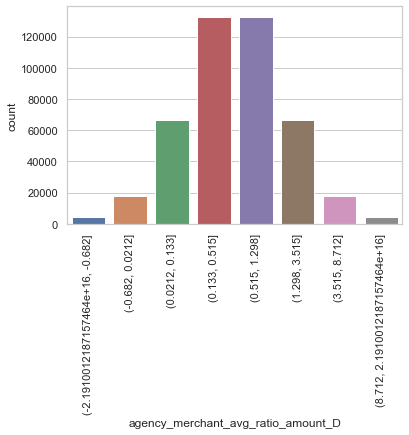

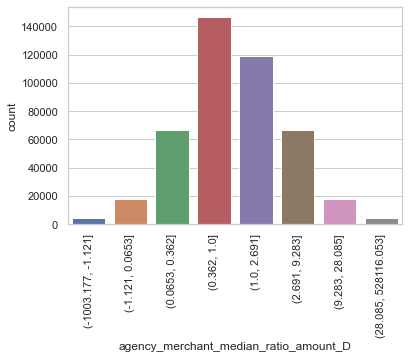

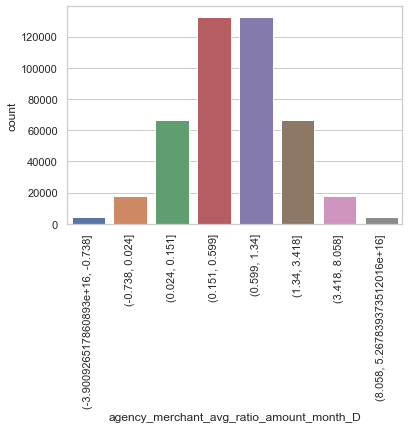

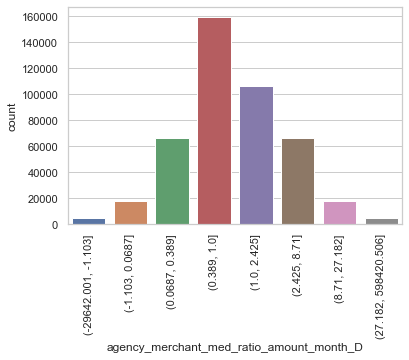

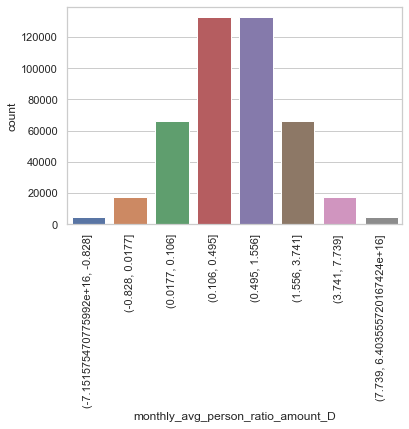

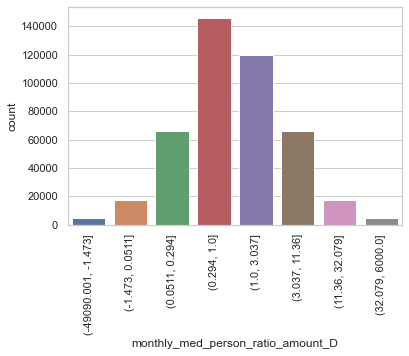

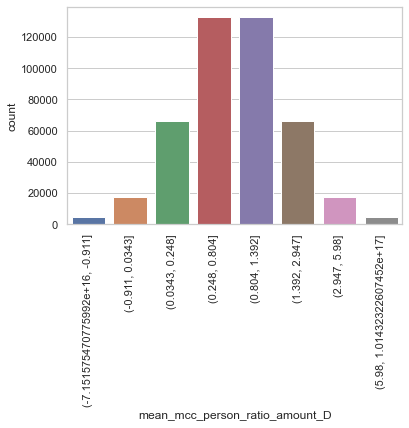

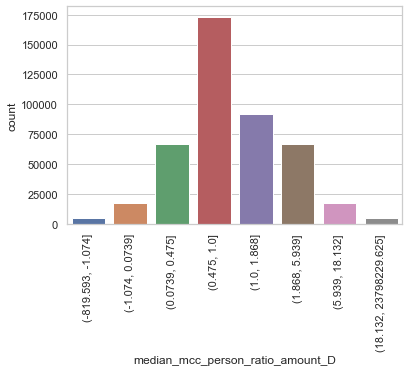

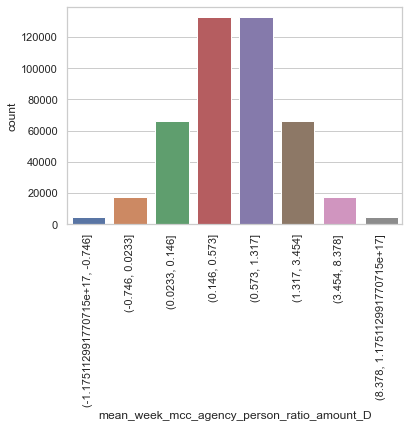

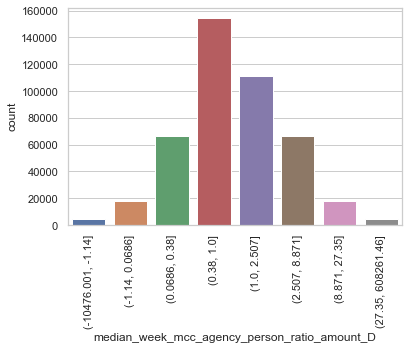

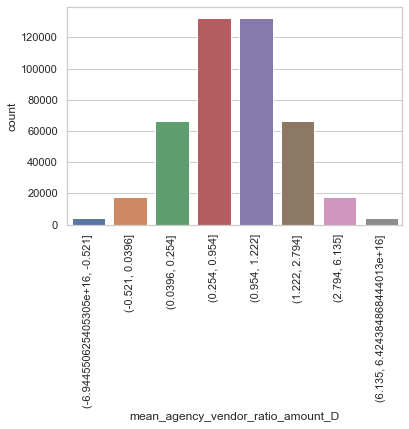

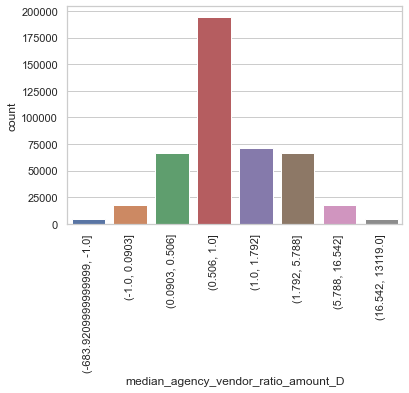

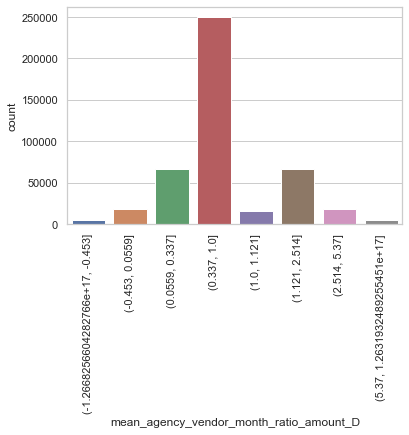

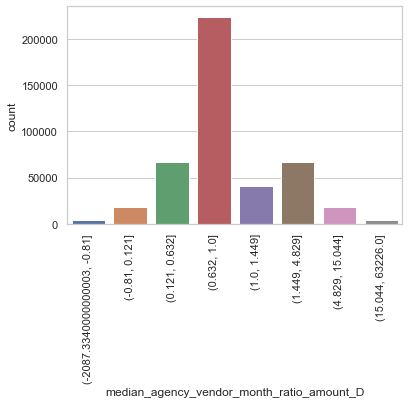

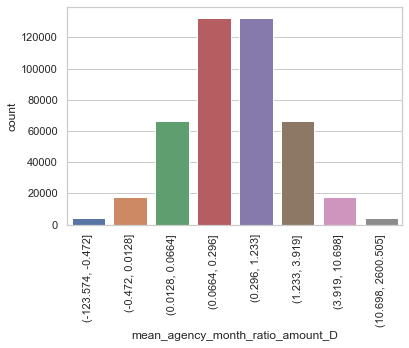

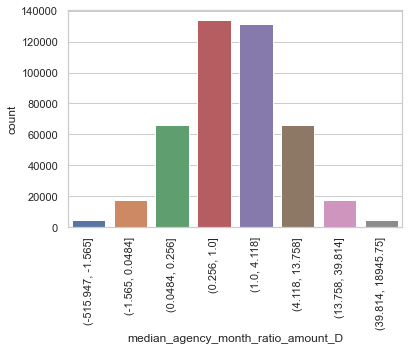

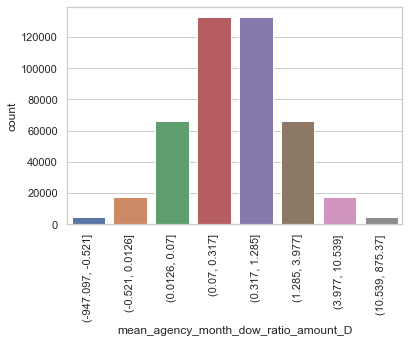

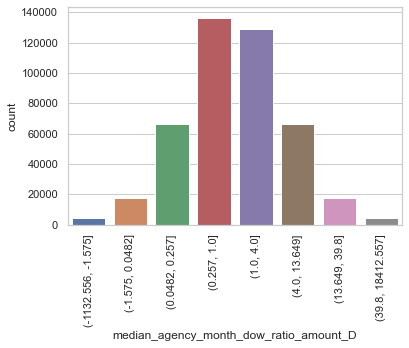

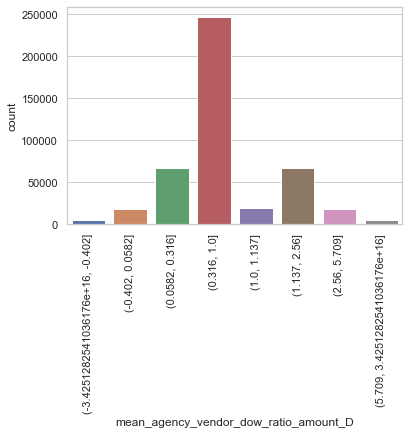

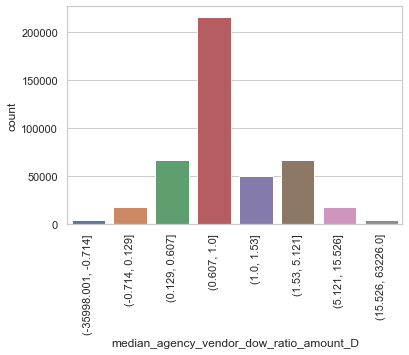

In [93]:
for i in features3:
    try:
        plt.figure(figsize=(6,4))
        g = sns.countplot(x=i, data=df2)
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
    except:
        pass

In [95]:
df2[df2.agency_merchant_median_ratio_amount < df2.agency_merchant_median_ratio_amount.quantile(0.99)].describe()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_avg_ratio_amount_month,agency_merchant_med_ratio_amount_month,monthly_avg_person_ratio_amount,monthly_med_person_ratio_amount,mean_mcc_person_ratio_amount,median_mcc_person_ratio_amount,mean_week_mcc_agency_person_ratio_amount,median_week_mcc_agency_person_ratio_amount,mean_agency_vendor_ratio_amount,median_agency_vendor_ratio_amount,mean_agency_vendor_month_ratio_amount,median_agency_vendor_month_ratio_amount,mean_agency_month_ratio_amount,median_agency_month_ratio_amount,mean_agency_month_dow_ratio_amount,median_agency_month_dow_ratio_amount,mean_agency_vendor_dow_ratio_amount,median_agency_vendor_dow_ratio_amount
count,4.380330e+05,438033.000000,4.380330e+05,438033.000000,4.380330e+05,438033.000000,4.380330e+05,438033.000000,4.380330e+05,438033.000000,4.380330e+05,438033.000000,4.380330e+05,438033.000000,438033.000000,438033.000000,438033.000000,438033.000000,4.380330e+05,438033.000000
mean,8.519440e-01,1.982528,8.985200e-01,1.868631,-1.233180e+11,2.460176,-4.971551e+11,1.677657,-8.048113e+11,1.930508,-2.056769e+11,1.626352,-3.605343e+10,1.650643,0.849287,3.031215,0.869906,3.010861,9.608431e-01,1.640095
std,7.585240e+13,4.267439,1.789986e+14,45.333752,1.508696e+14,85.282931,4.194957e+14,21.433729,6.767214e+14,38.847487,2.461684e+14,20.440193,4.188473e+14,98.440894,2.003414,9.905375,2.755626,13.674435,1.309111e+14,123.800169
min,-2.191001e+16,-1003.176471,-3.900927e+16,-29642.000000,-7.151575e+16,-49090.000000,-7.151575e+16,-819.591837,-1.175113e+17,-10476.000000,-6.944551e+16,-683.920000,-1.266826e+17,-2087.333333,-123.573370,-515.945612,-947.095785,-1132.555000,-3.425128e+16,-35998.000000
25%,1.748051e-01,0.460948,1.989502e-01,0.497151,1.440607e-01,0.396023,3.262659e-01,0.599984,1.913638e-01,0.485988,3.356091e-01,0.650699,4.566874e-01,0.812751,0.087255,0.317078,0.091534,0.324750,4.234945e-01,0.774528
50%,5.057030e-01,1.000000,5.899224e-01,1.000000,4.852433e-01,1.000000,7.950455e-01,1.000000,5.617201e-01,1.000000,9.407215e-01,1.000000,1.000000e+00,1.000000,0.290299,0.995324,0.310188,1.000000,1.000000e+00,1.000000
75%,1.075490e+00,2.052772,1.101508e+00,1.855252,1.238605e+00,2.270133,1.183702e+00,1.512028,1.089436e+00,1.917481,1.028517e+00,1.420880,1.000000e+00,1.152733,0.915157,3.044647,0.981963,2.946483,1.000000e+00,1.216944
max,2.191001e+16,28.080950,5.267839e+16,1791.000000,6.403556e+16,6000.000000,1.014323e+17,13119.000000,1.012297e+17,10476.000000,6.424385e+16,13119.000000,1.263193e+17,63226.000000,208.543476,1486.585716,296.699031,6057.794937,3.425128e+16,63226.000000


In [101]:
low = .05
high = .95
df3 = df2.quantile([low, high])
#print(df3)

In [102]:
df4 = df2.apply(lambda x: x[(x>df3.loc[low,x.name]) & 
                                    (x < df3.loc[high,x.name])], axis=0)

In [106]:
df4 = df4.dropna()

In [107]:
df4.describe()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_avg_ratio_amount_month,agency_merchant_med_ratio_amount_month,monthly_avg_person_ratio_amount,monthly_med_person_ratio_amount,mean_mcc_person_ratio_amount,median_mcc_person_ratio_amount,mean_week_mcc_agency_person_ratio_amount,median_week_mcc_agency_person_ratio_amount,mean_agency_vendor_ratio_amount,median_agency_vendor_ratio_amount,mean_agency_vendor_month_ratio_amount,median_agency_vendor_month_ratio_amount,mean_agency_month_ratio_amount,median_agency_month_ratio_amount,mean_agency_month_dow_ratio_amount,median_agency_month_dow_ratio_amount,mean_agency_vendor_dow_ratio_amount,median_agency_vendor_dow_ratio_amount
count,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000,310801.000000
mean,0.610474,1.250414,0.665769,1.224317,0.678950,1.400233,0.796709,1.137190,0.644612,1.228362,0.786292,1.127219,0.841740,1.090926,0.494075,1.652196,0.520962,1.624229,0.820406,1.100331
std,0.509931,1.089657,0.531952,1.057512,0.674917,1.528043,0.519184,0.805451,0.521520,1.057255,0.460313,0.743613,0.430597,0.646945,0.588933,1.975927,0.609844,1.939948,0.433453,0.678349
min,0.021285,0.065523,0.023961,0.068768,0.017735,0.051100,0.034254,0.073913,0.023351,0.068581,0.039571,0.090351,0.055938,0.121104,0.012780,0.048499,0.012645,0.048344,0.058194,0.128912
25%,0.212507,0.532946,0.237243,0.566498,0.173449,0.464618,0.375465,0.670801,0.229388,0.554654,0.386152,0.730569,0.491614,0.857158,0.102414,0.370705,0.108819,0.379915,0.452684,0.819997
50%,0.465341,1.000000,0.537574,1.000000,0.440225,1.000000,0.763269,1.000000,0.511059,1.000000,0.865472,1.000000,1.000000,1.000000,0.262654,0.899827,0.279892,0.922043,1.000000,1.000000
75%,0.890447,1.549907,1.000000,1.441871,0.989889,1.670678,1.029402,1.273502,0.976364,1.470682,1.000000,1.195406,1.000000,1.033344,0.644623,2.097929,0.695700,2.023143,1.000000,1.073983
max,3.514701,9.241109,3.416136,8.709398,3.740320,11.360000,2.947242,5.938914,3.451327,8.870968,2.793489,5.788145,2.514340,4.828640,3.918442,13.757468,3.976551,13.648769,2.560146,5.120000


## KNN Model

it uses the math behind the classification algorithm KNN. Indeed, for any data point, the distance to its kth nearest neighbor could be viewed as the outlying score. PyOD supports three KNN detectors: largest, mean and median, which use as outlying score, respectively, the distance of the kth neighbor, the average of all the k neighbors and the median distance to k neighbors.

In [108]:
### importint required packages
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler, normalize
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

In [109]:
X_train, X_test = train_test_split(df4,test_size = 0.3, random_state=0)

creating the KNN model and fitting with data 

In [110]:
from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [111]:
# Now we have the trained K-NN model, let's apply to the test data to get the predictions
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = clf.decision_function(X_test)

In [112]:
y_pd = pd.DataFrame(y_test_scores)

In [113]:
y_pd.columns = ['test_score']
y_pd.describe()

,test_score
count,93241.000000
mean,0.803738
std,0.669449
min,0.000000
25%,0.336031
50%,0.623958
75%,1.099608
max,6.334622


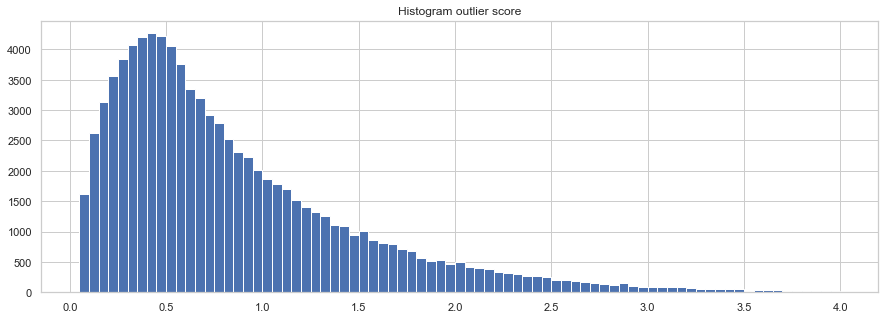

In [116]:
# Use histogram to define a reasonable boundry to identify anomalies. 
bins_a = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,
1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,
2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,2.7,2.75,2.8,2.85,2.9,2.95,3.0,
3.05,3.1,3.15,3.2,3.25,3.3,3.35,3.4,3.45,3.5,3.55,3.6,3.65,3.7,3.75,3.8,3.85,3.9,3.95,4.0] 
plt.figure(figsize=(15,5))
plt.hist(y_test_scores, bins=bins_a) 
plt.title("Histogram outlier score")
plt.show()

In [138]:
# Let's see how many '0's and '1's.
# Choosing 1.5 as cutoff given that we then have <10% outliers. 
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<3.5, 0, 1)
df_test['cluster'].value_counts()

0    92855
1      386
Name: cluster, dtype: int64

In [ ]:
# Standardize data
x_test1 = X_test.drop(['score','cluster'],axis=1)
X_train_norm, X_test_norm = standardizer(X_train, x_test1)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
n_clf = 20
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [120]:
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

### Method 1: Average

In [121]:
y_by_average = average(test_scores_norm)

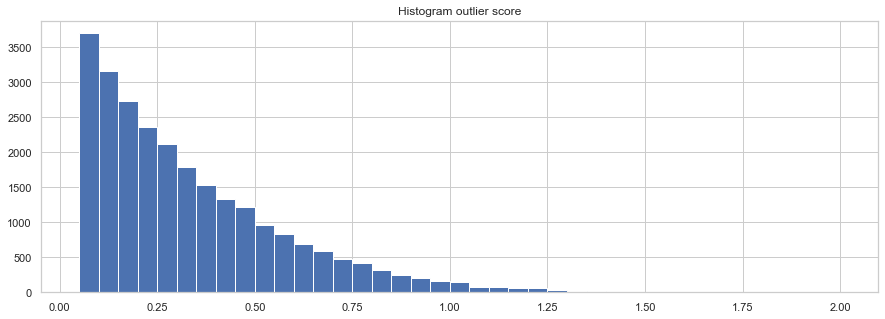

In [123]:
# Use histogram to define a reasonable boundry to identify anomalies. 
bins_a = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,
1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2] 
plt.figure(figsize=(15,5))
plt.hist(y_by_average, bins=bins_a) 
plt.title("Histogram outlier score")
plt.show()

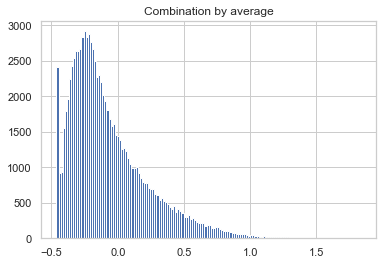

In [124]:
# Combination by average
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [132]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0.7, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    90895
1     2346
Name: y_by_average_cluster, dtype: int64

### Method 2: The Maximum of Maximum (MOM)

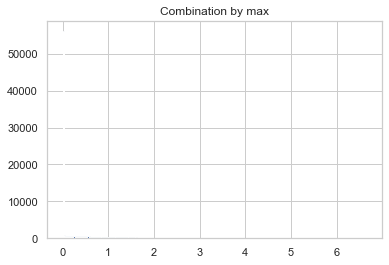

In [133]:
# Combination by mom
y_by_maximization = maximization(test_scores_norm)
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [134]:
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0.7, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    73165
1    20076
Name: y_by_maximization_cluster, dtype: int64

### Method 3: The Average of Maximum (AOM)

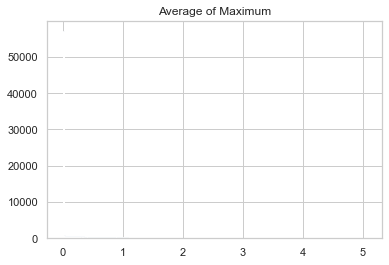

In [135]:
# Combination by aom
y_by_aom = aom(test_scores_norm, n_buckets=5)
plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

In [136]:
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<0.7, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    77036
1    16205
Name: y_by_aom_cluster, dtype: int64

### Method 4: The maximum of average (MOA)

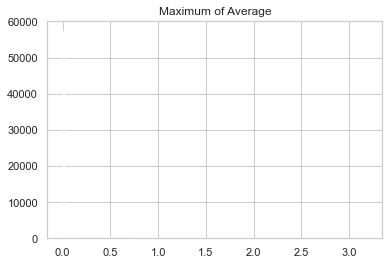

In [130]:
# Combination by moa
y_by_moa = moa(test_scores_norm, n_buckets=5)
plt.hist(y_by_moa, bins='auto')  # arguments are passed to np.histogram
plt.title("Maximum of Average")
plt.show()

In [137]:
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<0.7, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    83781
1     9460
Name: y_by_moa_cluster, dtype: int64

## Conclusion
The KNN model on average identifies nearly 12% of the records as outliers based on the limits chosen. They are to be subjected to further investigation. 
The model initially ran for a long time and didnt conclude to a result. So I have removed records containing extreme values from the data. Both top and bottom 5 percentile of data has been removed to make it easy for the model to run.